# PRACTICAL ASSIGNMENT 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\Users\naren\Desktop\DESKTOP MAMTA\STUDY BSC DATA ANALYTICS\semester 3 bsc Data Analytics\ML\china_gdp - china_gdp.csv")
data.head()

,Year,Value1,Value2
0,1960,5.918412e+10,2
1,1961,4.955705e+10,2
2,1962,4.668518e+10,2
3,1963,5.009730e+10,2
4,1964,5.906225e+10,2


In [3]:
x = data[['Year','Value2']].iloc[:55]
y = data['Value1'].iloc[:55]
x_test = data[['Year','Value2']].iloc[55]

In [4]:
x,y,x_test = np.array(x),np.array(y),np.array(x_test)

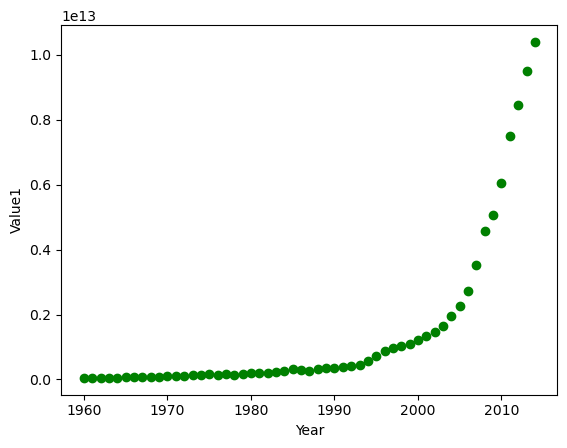

In [5]:
plt.scatter(x[:,0],y,color = "green")
plt.xlabel("Year")
plt.ylabel("Value1")
plt.show()

# Gradient Boosting From scratch

With both the features

Muliple Linear Regression code for two features

In [6]:
# Mean square error
def loss(y_true,y_pred):
    s = 0
    for i in range(len(y_true)):
        s+=(y_true[i]-y_pred[i])**2
    return (1/len(y_true))*s

#Predicting y for every updated weights
def predicted_y(weight,x,bias):
    y_list = []
    for i in range(x.shape[0]):  
        y_list.append((weight@x[i])+bias)
    return np.array(y_list)

In [7]:
def updates(y_true,y_pred,x,lr,weight,bias):
    a,b = 0,0
    for i in range(len(y_true)):
        a+= (-x[i]*(y_true[i]-y_pred[i]))
        b+= (-(y_true[i]-y_pred[i]))
    weight = weight-lr*(2/len(y_true))*a
    bias = bias - lr*(2/len(y_true))*b

    return weight, bias

In [8]:
def linear_regression(x,y,lr,epochs):
    weight = np.random.randn(x.shape[1])
    bias = 0
    linear_loss = []
    for i in range(epochs):
        y_pred = predicted_y(weight,x,bias)
        weight,bias = updates(y,y_pred,x,lr,weight,bias)
        linear_loss.append(loss(y,y_pred))
    return weight,bias,linear_loss
w,b,linear_loss = linear_regression(x,y,0.00000001,100)
w,b

(array([7.30603157e+08, 6.78360756e+05]), 339180.1684393499)

Text(0, 0.5, 'loss')

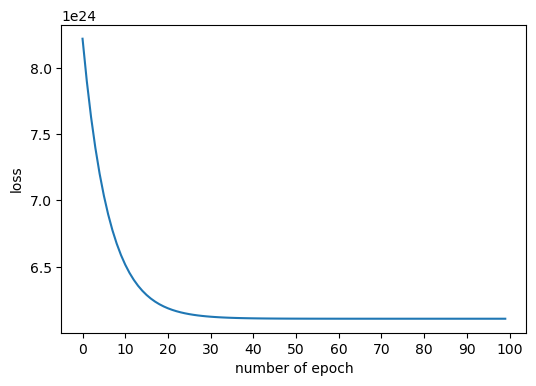

In [9]:
#mse vs epoch before applying boosting
plt.figure(figsize = (6,4))
plt.plot(np.arange(100),linear_loss)
plt.xticks(np.arange(0,110,10))
plt.xlabel("number of epoch")
plt.ylabel("loss")

In [10]:
#prediction for x-test without using boosting
y_pred = predicted_y(w,x_test.reshape(1,-1),b)
float(y_pred)

1472167057356.987

In [11]:
#R-squared value for general linear regression
def R_squared(y_true,y_pred):
    sse = np.sum((y_pred-y_true)**2)
    ssr = np.sum((y_pred-np.mean(y_true))**2)
    sst = ssr+sse
    return 1-(sse/sst)
y_predicted = predicted_y(w,x,b)
rscore = R_squared(y,y_predicted)
round(rscore,4)

0.0001

GRADIENT BOOSTING WITH LINEAR REGRESSION AS A BASE LEARNER

compute the average of the target column

fit a model on residual as target and independent columns as the columns of data and predict the residuals

update the default prediction (old prediction+lr*residual predicted)

In [13]:
#gradient boosting for linear regression using mse as the loss function
#gradient boosting is the second order gradient descent
def gradient_boost_linear(x,y,iterations,eta):
    lr = 0.000000001
    fm = np.mean(y)
    fitted_lines = []
    mse = []
    for i in range(iterations):
        res = y-fm
        l,m,c = linear_regression(x,res,lr,100) #l = coefficients, m = bias, c = mse loss
        res = predicted_y(l,x,m)
        fm += eta*res
        fitted_lines.append([l,m])
        mse.append(loss(y,fm))
    return fm,np.array(fitted_lines),mse

#predictions for the test point
values,lines_fitted,mse= gradient_boost_linear(x,y,2000,0.1) 
f0 = np.mean(y)
def gradient_boost_linear_predictions(x,eta,iterations):
    fm = f0
    for i in range(iterations):
        l,m = lines_fitted[i]
        fm+=eta*predicted_y(l,x,m)
    return fm

C:\Users\naren\AppData\Local\Temp\ipykernel_10504\2123968798.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return fm,np.array(fitted_lines),mse


In [14]:
#predicting x_test from linear regression as the base learner of the gradient boosting algorithm
prediction = gradient_boost_linear_predictions(x_test.reshape(1,-1),0.1,2000)
print("the prediction for the x-test using gradient boost with linear regression as base learner is\n",float(prediction))
print("RMSE is = ",np.sqrt(loss(y,values)))

the prediction for the x-test using gradient boost with linear regression as base learner is
 1452392536702.6116
RMSE is =  2479951413733.9634


Text(0, 0.5, 'loss')

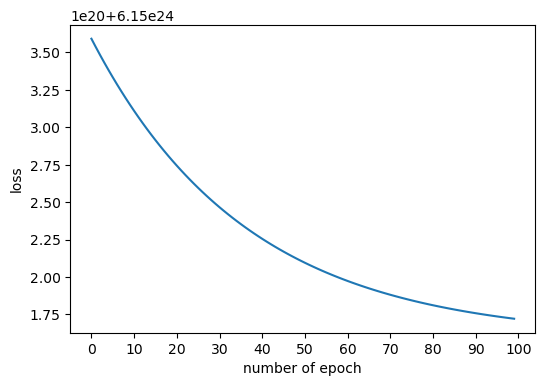

In [16]:
#mse vs epoch after applying boosting
plt.figure(figsize = (6,4))
plt.plot(np.arange(100),mse)
plt.xticks(np.arange(0,110,10))
plt.xlabel("number of epoch")
plt.ylabel("loss")

C:\Users\naren\AppData\Local\Temp\ipykernel_13732\3741213649.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return fm,np.array(fitted_lines),mse


[]

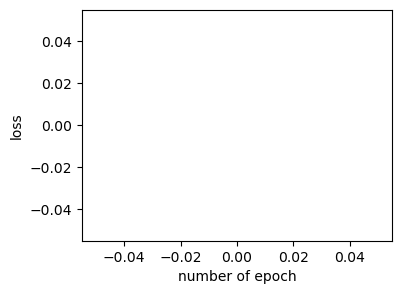

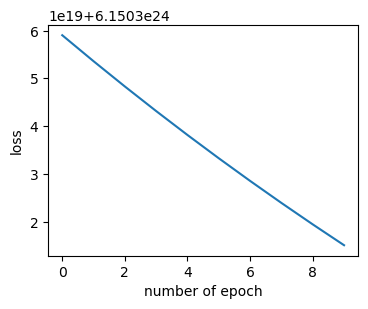

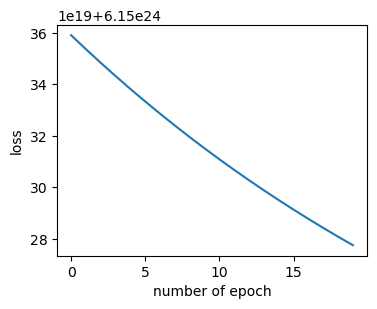

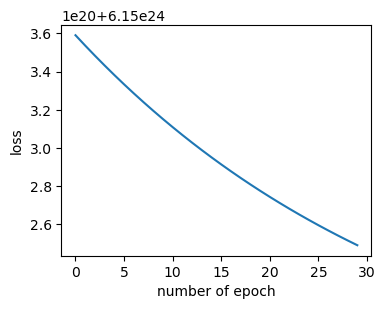

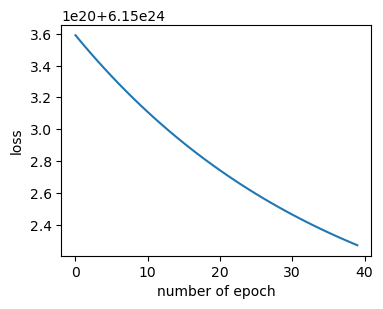

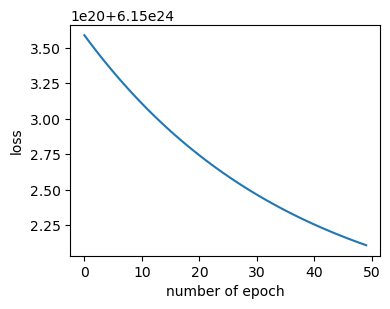

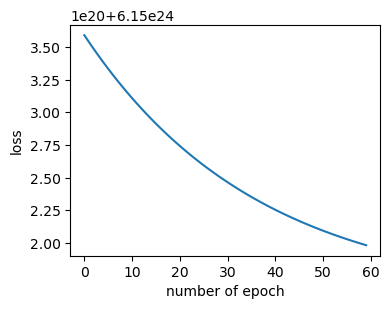

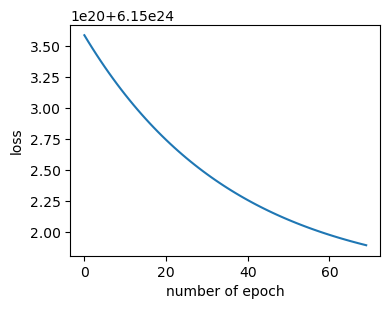

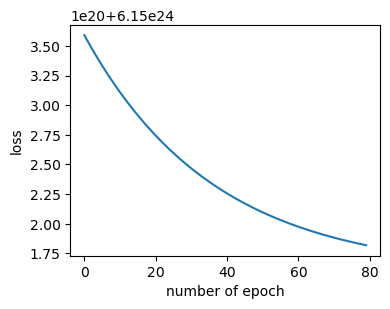

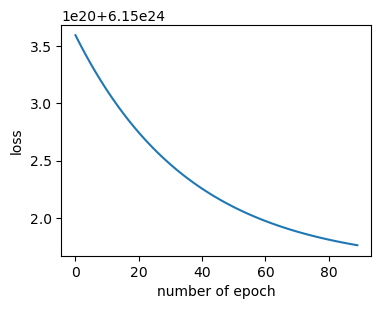

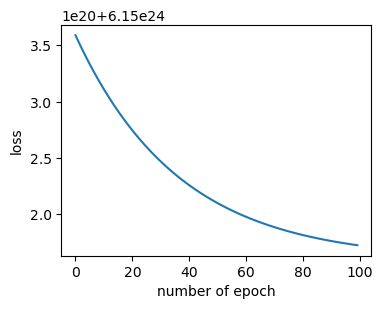

In [19]:
#mse loss for 10,20,30,...100 iterations
losses_iterwise = []
for i in np.arange(0,110,10):
    _,_,errors= gradient_boost_linear(x,y,i,0.025)
    plt.figure(figsize = (4,3))
    plt.plot(np.arange(0,i),errors)
    plt.xlabel("number of epoch")
    plt.ylabel("loss")
losses_iterwise

In [21]:
#R-square value before using all the features
def R_squared(y_true,y_pred):
    sse = np.sum((y_pred-y_true)**2)
    ssr = np.sum((y_pred-np.mean(y_true))**2)
    sst = ssr+sse
    return 1-(sse/sst)
rscore = R_squared(y,values)
rscore

1.8693430625882357e-05

GRADIENT BOOSTING WITH DECISION TREES AS BASE LEARNER

In [22]:
#gradient boosting for linear regression using mse as the loss function
#gradient boosting is the second order gradient descent
from sklearn.tree import DecisionTreeRegressor
def gradient_boost_tree(x,y,iterations,eta):
    fm = np.mean(y) 
    fitted_trees = []
    mse_loss = []
    for i in range(iterations):
        res = y-fm
        tree = DecisionTreeRegressor(max_depth = 2).fit(x,res)
        res = tree.predict(x)
        fm += eta*res
        fitted_trees.append(tree)
        mse_loss.append(loss(y,fm))
    return fm,np.array(fitted_trees),mse_loss

#predictions for the test point
values,trees_fitted,mse_loss= gradient_boost_tree(x,y,100,0.01)
f0 = np.mean(y)
def gradient_boost_tree_predictions(x,eta,iterations):
    fm = f0
    for i in range(iterations):
        fm+=eta*trees_fitted[i].predict(x)
    return fm

In [23]:
#predicting x_test from the decision tree as base learner of boosting
prediction = gradient_boost_tree_predictions(x_test.reshape(1,-1),0.01,100)
print("the prediction for the x-test using gradient boost with linear regression as base learner is\n",float(prediction))
print("RMSE is = ",np.sqrt(loss(y,values)))

the prediction for the x-test using gradient boost with linear regression as base learner is
 6513530350816.891
RMSE is =  961548852505.9677


In [24]:
#R-square value using both the features
def R_squared(y_true,y_pred):
    sse = np.sum((y_pred-y_true)**2)
    ssr = np.sum((y_pred-np.mean(y_true))**2)
    sst = ssr+sse
    return 1-(sse/sst)
rscore = R_squared(y,values)
round(rscore,2) 

0.72

Text(0, 0.5, 'loss')

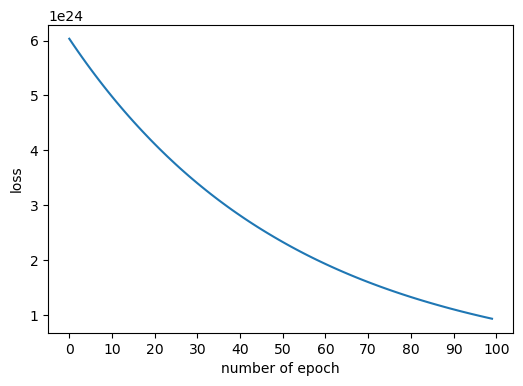

In [25]:
#mse vs epoch after applying boosting
plt.figure(figsize = (6,4))
plt.plot(np.arange(100),mse_loss)
plt.xticks(np.arange(0,110,10))
plt.xlabel("number of epoch")
plt.ylabel("loss")

VALIDATING THE RESULTS OF THE GRADIENT BOOSTING ALGORITHM FROM SCRATCH TO SKLEARN

In [26]:
#this code is referenced from the sklearn library
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
from sklearn import datasets
gbr = GradientBoostingRegressor(n_estimators = 100,max_depth = 2,learning_rate = 0.01)
gbr.fit(x,y)
predicted = gbr.predict(x)
print("prediction of xtest is", float(gbr.predict(x_test.reshape(1,-1))))
print("rmse of training ",np.sqrt(MSE(y,predicted)))

prediction of xtest is 6513530350816.891
rmse of training  961548852505.9677


IMPORTANCE OF THE FEATURES

[7.30603157e+08 6.78358664e+05]


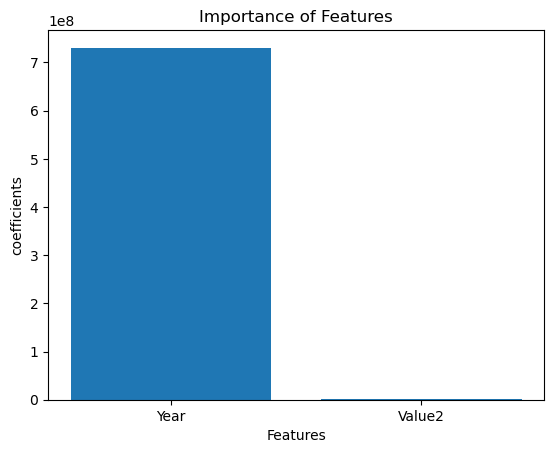

In [44]:
#Reporting importance of features
#the feature having larger absolute value of the coefficient (weight) will have the greater importance.
#from the below figure we can determine that the feature 'Year' have greater importance over the feature 'Value2'
print(w) #weights/coefficients of linear equation provided by the linear regression funtion
plt.bar(["Year","Value2"],w)
plt.title("Importance of Features")
plt.xlabel('Features')
plt.ylabel('coefficients')
plt.show()

The feature 'Value2' is having neglible importance as compared to the feature 'Year'

Thus, we can consider to drop the feature 'Value2' from the data

In [36]:
#after dropping the feature 'Value2'
x_train = x[:,0]
x_train

array([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014],
      dtype=int64)

Verifying whether the results of the test prediction after dropping the 'Value2' feature is same as with the data with feature 'Value2'

In [37]:
# linear regression for single feature
def loss(yt,yp):
    return (np.sum((yt-yp)**2)/len(yt))

def updates(yt,yp,x,lr,m,c):
    m = m- lr*2*np.sum((-x)*(yt-yp)/len(yt))
    c = c- lr*2*np.sum((yt-yp)/len(yt))
    return m,c

def regression(x,y,lr,epoch):
    m,c = 10,0
    total_loss = []
    for i in range(epoch):
        yp = m*x_train + c    
        total_loss.append(loss(y,yp))
        m,c = updates(y,yp,x,lr,m,c)
    return m,c
def predicted_y(m,x,c):
    y_pred = []
    y_pred.append(m*x+c)
    return np.array(y_pred)

In [38]:
def gradient_boost(x,y,iterations,eta):
    lr = 0.000000001
    fm = np.mean(y)
    fitted_lines = []
    mse = []
    for i in range(iterations):
        res = y-fm
        m,c = regression(x_train,res,lr,100) 
        res = predicted_y(m,x_train,c)
        fm += eta*res
        fitted_lines.append([m,c])
        mse.append(loss(y,fm))
    return fm,fitted_lines,mse
# predictions for the test point
values,lines_fitted,mse = gradient_boost(x_train,y,100,0.015)
f0 = np.mean(y)
def gradient_boost_predictions(x,eta,iterations):
    fm = f0
    for i in range(iterations):
        l,m = lines_fitted[i]
        fm+=eta*predicted_y(l,x,m)
    return fm
prediction = gradient_boost_predictions(x_test[0],0.015,100)
print("the prediction for the x-test using gradient boost with linear regression as base learner is\n",float(prediction))
print("RMSE = ",np.sqrt(loss(y,values)))

the prediction for the x-test using gradient boost with linear regression as base learner is
 1449163254450.5781
RMSE =  2479953476126.7534


In [40]:
values,trees_fitted,mse_loss= gradient_boost_tree(x_train.reshape(-1,1),y,100,0.01)

In [41]:
#predictions using only 'Value1' as a feature
def R_squared(y_true,y_pred):
    sse = np.sum((y_pred-y_true)**2)
    ssr = np.sum((y_pred-np.mean(y_true))**2)
    sst = ssr+sse
    return 1-(sse/sst)
rscore = R_squared(y,values)
round(rscore,5)

0.7171

In [42]:
values,trees_fitted,mse_loss= gradient_boost_tree(x[:,1].reshape(-1,1),y,100,0.01)

In [43]:
#predictions using only 'Value2' as a feature
def R_squared(y_true,y_pred):
    sse = np.sum((y_pred-y_true)**2)
    ssr = np.sum((y_pred-np.mean(y_true))**2)
    sst = ssr+sse
    return 1-(sse/sst)
rscore = R_squared(y,values)
round(rscore,5)

0.0